# Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[15,7]

import warnings
warnings.filterwarnings('ignore')

In [217]:
# Loading the dataset
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [218]:
train.shape, test.shape

((614, 13), (367, 12))

In [219]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [220]:
# Combining the dataset
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(981, 13)

In [221]:
# changing to correct dtypes
combined.Credit_History=combined.Credit_History.astype('O')

## Univariate Analysis

In [222]:
combined.select_dtypes(include=np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [223]:
combined.select_dtypes(include=np.number)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
976,4009,1777.0,113.0,360.0
977,4158,709.0,115.0,360.0
978,3250,1993.0,126.0,360.0
979,5000,2393.0,158.0,360.0


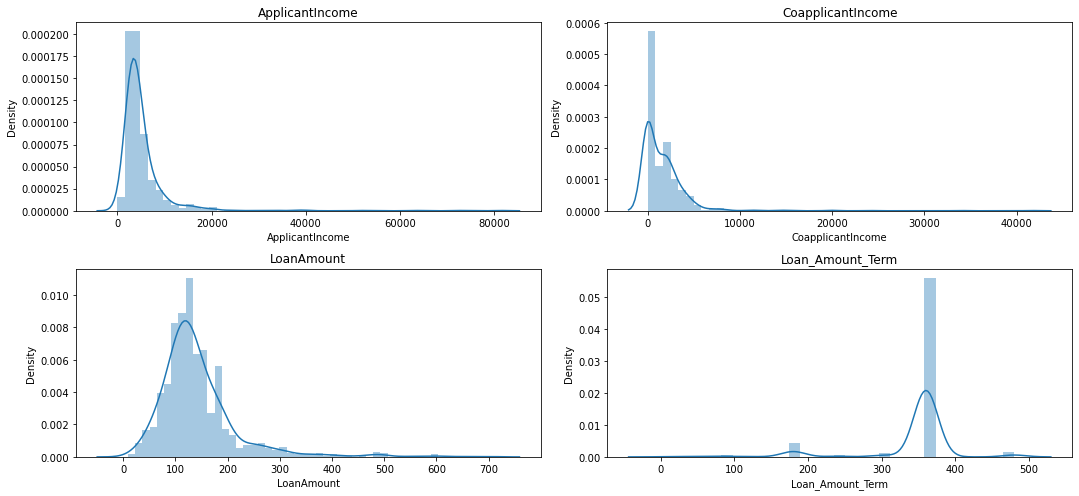

In [224]:
# Numeric
n_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

it=1
for i in n_cols:
    plt.subplot(2,2,it)
    sns.distplot(combined.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

* Applicantincome, CoapplicantIncome, Loanamount are higly right skewed.
* Loan_Amount_Term is slightly left skewed.

In [225]:
combined.select_dtypes(include='O').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [226]:
combined.select_dtypes(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,1.0,Rural,NaN


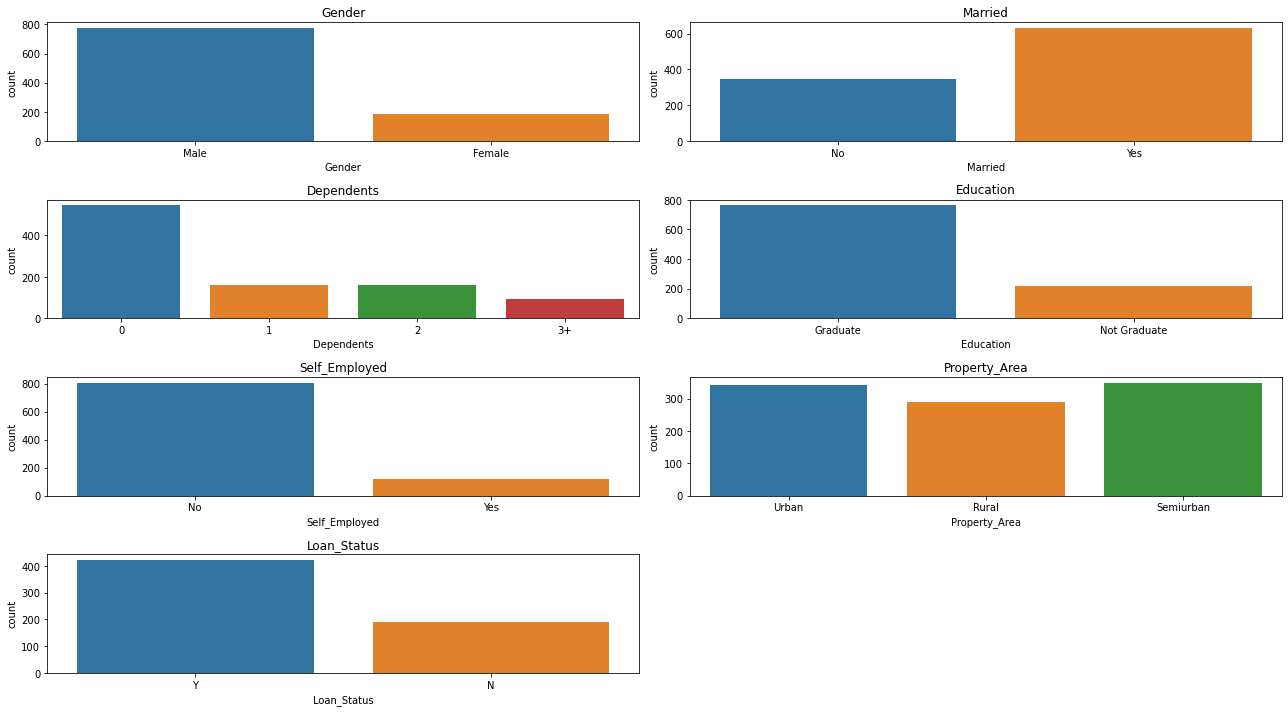

In [227]:
# Catergorical
c_cols=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(18,10))
it=1
for i in c_cols:
    plt.subplot(4,2,it)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

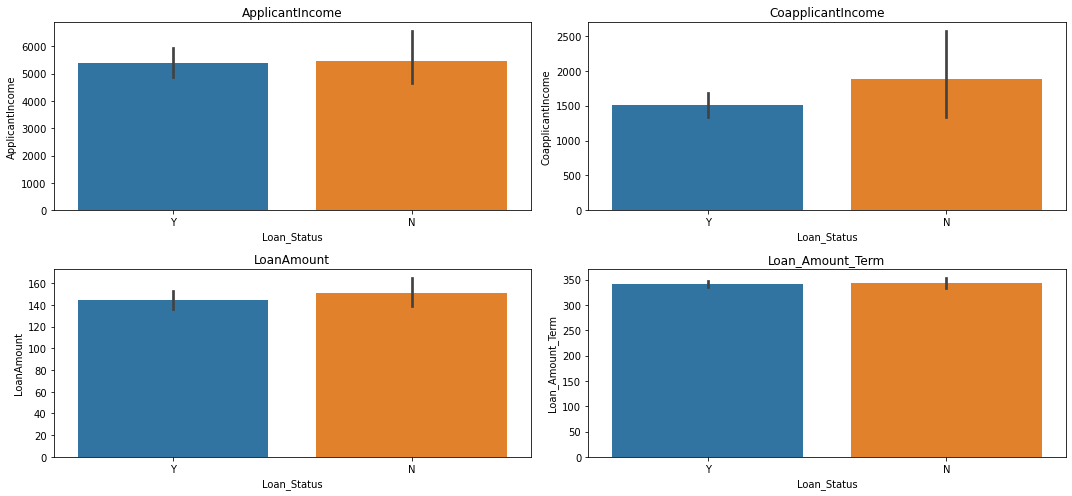

In [228]:
# Num vs cat
n_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

it=1
for i in n_cols:
    plt.subplot(2,2,it)
    sns.barplot(y=combined.loc[:,i],x=combined['Loan_Status'])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

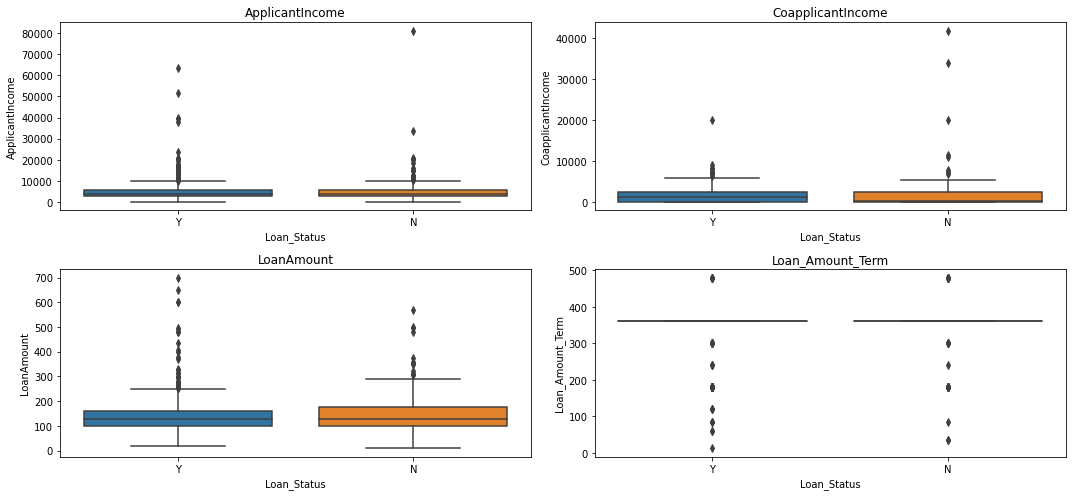

In [229]:
n_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

it=1
for i in n_cols:
    plt.subplot(2,2,it)
    sns.boxplot(y=combined.loc[:,i],x=combined['Loan_Status'])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

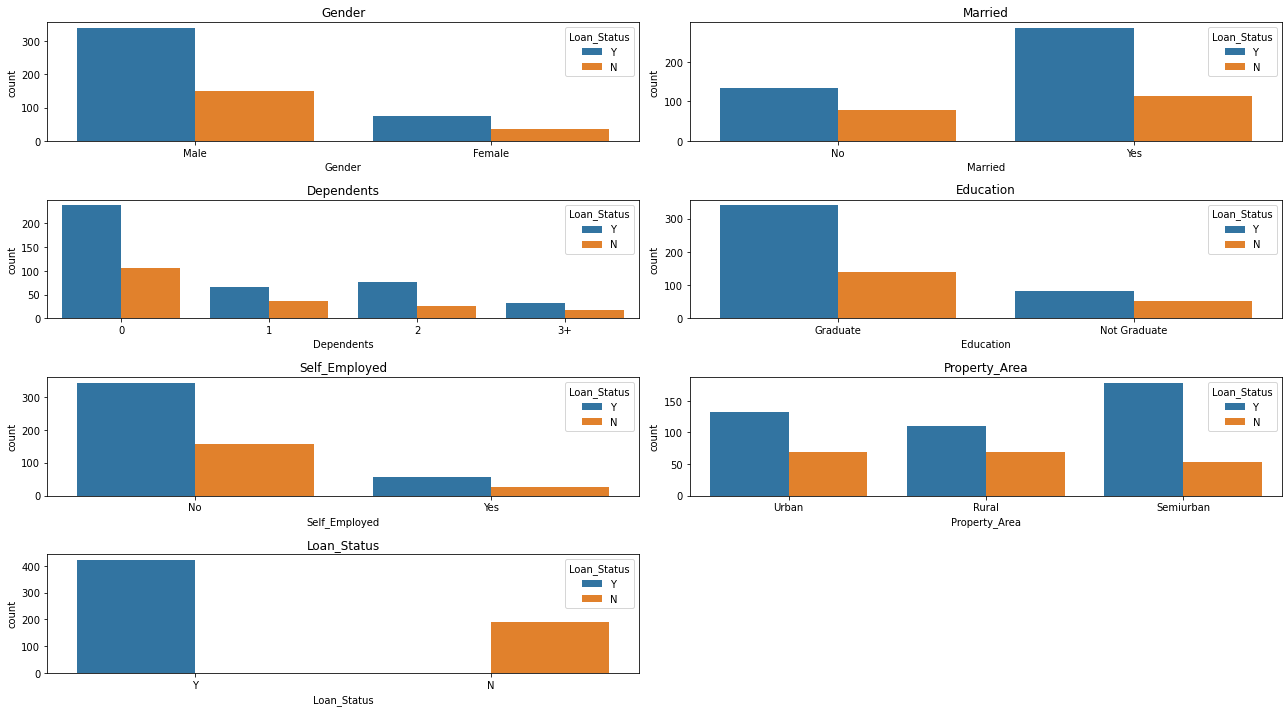

In [230]:
c_cols=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(18,10))
it=1
for i in c_cols:
    plt.subplot(4,2,it)
    sns.countplot(combined.loc[:,i],hue=combined['Loan_Status'])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

## Multivariate analysis

<AxesSubplot:>

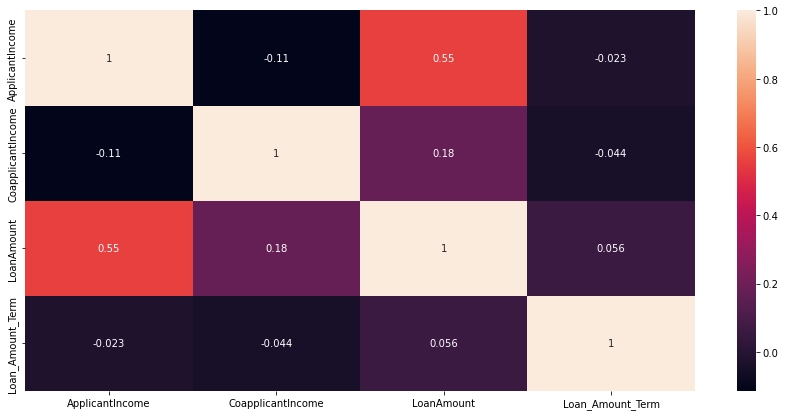

In [231]:
sns.heatmap(combined.corr(),annot=True)

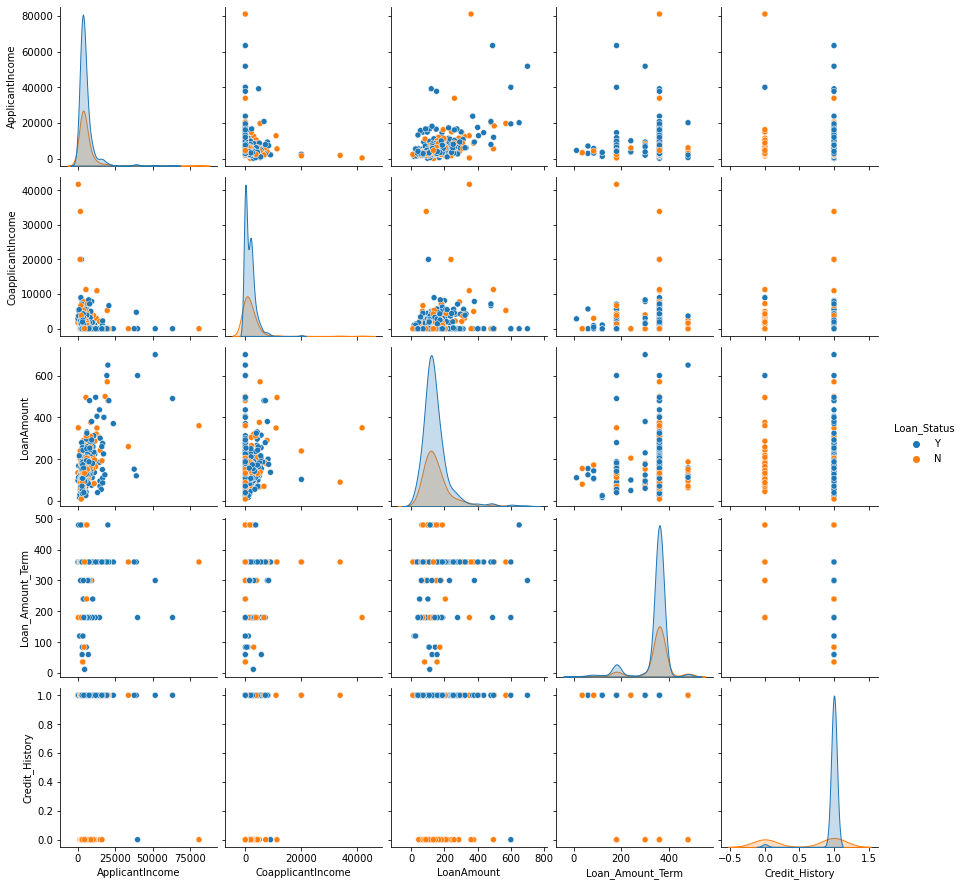

In [232]:
sns.pairplot(combined,hue='Loan_Status')

In [233]:
sub=pd.read_csv('sample_submission_49d68Cx.csv')
sub['Loan_Status']='Y'

In [234]:
sub.to_csv('Submission.csv',index=False)

## Missing Value

In [235]:
combined.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [236]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Gender               24
Married               3
Dependents           25
Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [237]:
# Gender imputing with ffill 
combined.Gender=combined.Gender.ffill()

In [238]:
# Married impuing with mode
combined.Married=combined.Married.fillna(combined.Married.mode()[0])

In [239]:
# Dependent imputing
combined.loc[(combined['Married']=='Yes')& (combined['Dependents'].isna()),'Dependents']='2'
combined.loc[(combined['Married']=='No')& (combined['Dependents'].isna()),'Dependents']='0'

In [240]:
# Self_Employed imputing
combined['Self_Employed']=combined['Self_Employed'].fillna(combined['Self_Employed'].mode()[0])

In [241]:
# LoanAmount imputing 
combined.loc[(combined.Education=='Graduate')&(combined.LoanAmount.isnull()),'LoanAmount']=130.5
combined.loc[(combined.Education=='Not Graduate')&(combined.LoanAmount.isnull()),'LoanAmount']=118.0

In [242]:
# Loan_Amount_Term
combined.Loan_Amount_Term=combined.Loan_Amount_Term.fillna(combined.Loan_Amount_Term.mode()[0])

In [243]:
# Credit_History
combined.loc[(combined.Loan_Status==0)&(combined.Credit_History.isnull()),'Credit_History']=0.0
combined.loc[(combined.Loan_Status==1)&(combined.Credit_History.isnull()),'Credit_History']=1.0
combined.loc[(combined.Credit_History.isnull()),'Credit_History']=0.0

In [244]:
combined.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

## Outliers Detectors

<AxesSubplot:>

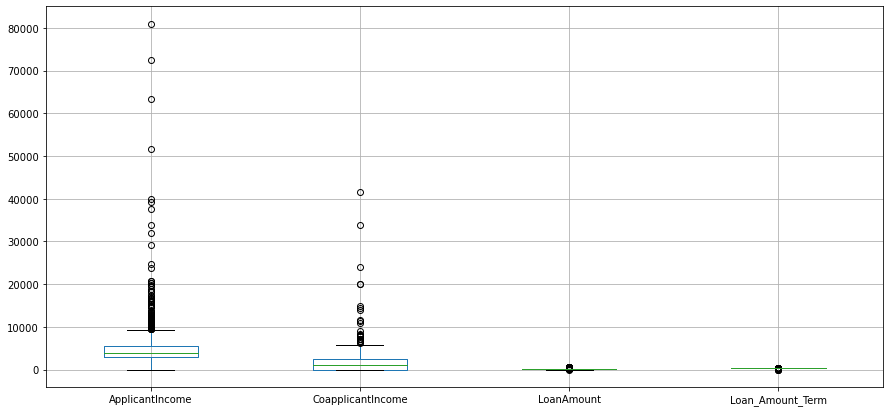

In [245]:
combined.boxplot()

## Feature Engineering

In [246]:
# Create Total_income column
combined['Total_income']=combined['ApplicantIncome']+combined['CoapplicantIncome']

In [247]:
# Creating new variable
combined['Credit_History_Income_Sum']=combined.groupby('Credit_History')['Total_income'].transform('sum')

<AxesSubplot:>

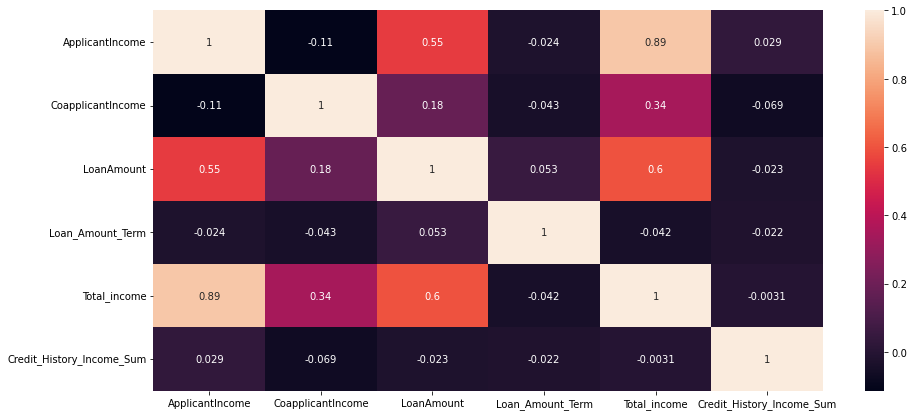

In [248]:
sns.heatmap(combined.corr(),annot=True)

## Splitting the data

In [249]:
newtrain=combined.iloc[0:train.shape[0]]
newtest=combined.iloc[train.shape[0]:]

In [250]:
newtrain.shape,newtest.shape,train.shape,test.shape

((614, 15), (367, 15), (614, 13), (367, 12))

In [251]:
# Drping the target variable from test 
newtrain.drop('Loan_ID',axis=1,inplace=True)
newtest.drop(['Loan_ID','Loan_Status'],axis=1,inplace=True)

## Stastical test

In [252]:
combined.select_dtypes(include='O').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [253]:
#cat vs cat-chisquare test
# ho:The predictor and target are not related
# h1: The preddictor and target are related
cat_cols=['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

sig_feat=[]
import scipy.stats as stats
for i in cat_cols:
    tbl=pd.crosstab(newtrain.loc[:,i],newtrain.Loan_Status)
    teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
    print('Pvalue for ',i,'is',round(pvalue,5))
    if (pvalue<0.05):
        sig_feat.append(i)
print(sig_feat)

Pvalue for  Gender is 0.84876
Pvalue for  Married is 0.02961
Pvalue for  Dependents is 0.4471
Pvalue for  Education is 0.0431
Pvalue for  Self_Employed is 1.0
Pvalue for  Property_Area is 0.00214
Pvalue for  Loan_Status is 0.0
Pvalue for  Credit_History is 0.0
['Married', 'Education', 'Property_Area', 'Loan_Status', 'Credit_History']


In [254]:
num_cols=newtrain.select_dtypes(include=np.number).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Total_income', 'Credit_History_Income_Sum'],
      dtype='object')

In [255]:
# Num Vs Cat
for i in num_cols:
    zero=newtrain.loc[newtrain.Loan_Status==0,i]
    ones=newtrain.loc[newtrain.Loan_Status==1,i]
    teststats,pvalue=stats.ttest_ind(zero,ones)
    print('Pvalue for ',i,'is',np.round(pvalue,5))

Pvalue for  ApplicantIncome is nan
Pvalue for  CoapplicantIncome is nan
Pvalue for  LoanAmount is nan
Pvalue for  Loan_Amount_Term is nan
Pvalue for  Total_income is nan
Pvalue for  Credit_History_Income_Sum is nan


## Scaling

In [256]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in num_cols:
    newtrain.loc[:,i]=mm.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i]=mm.transform(pd.DataFrame(newtest.loc[:,i]))

##  Encoding

In [257]:
# replacing the column values
newtrain.Loan_Status=newtrain.Loan_Status.replace({'N':0,'Y':1})

In [258]:
newtrain=pd.get_dummies(newtrain,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)
newtrain.shape,newtest.shape

((614, 17), (367, 16))

In [259]:
# Split
X=newtrain.drop('Loan_Status',axis=1)
y=newtrain.Loan_Status
X.shape

(614, 16)

##  Model Building

### Logistic Regression

In [260]:
final_pred_lr

,0
0,1


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
lr=LogisticRegression()
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))
#     accuracy.append(accuracy_score(ytest,pred))
finalpred_lr=pd.DataFrame(pred).T.mode(axis=1) 

In [262]:
finalpred_lr[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_lr
sub.to_csv('Logistic_Model_1.csv',index=False)         # 0.75.accuracy

## Decision Tree model

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
dt=DecisionTreeClassifier()
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(dt.fit(xtrain,ytrain).predict(newtest))

finalpred_dt=pd.DataFrame(pred).T.mode(axis=1) 

In [264]:
finalpred_dt[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_dt
sub.to_csv('Decision_Tree_Model_2.csv',index=False)  # 0.75.  # 0.7569444444444444.

## Random Forest Model

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
rf=RandomForestClassifier()
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

finalpred_rf=pd.DataFrame(pred).T.mode(axis=1) 

In [266]:
finalpred_rf[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_rf
sub.to_csv('Random_Forest_Model_1.csv',index=False)  # 0.75.

## Tuning the parameters of random forest model

In [267]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
params={'criterion': ['entropy', 'gini'],'max_depth': [10, 15, 20],'n_estimators':[10, 30, 50, 70, 90]}
grid=GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 90}

Build the model using the tuned hyperparameters.

In [268]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
rf=RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=90,random_state=0)
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

finalpred_rf=pd.DataFrame(pred).T.mode(axis=1) 

In [270]:
finalpred_rf[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_rf
sub.to_csv('Random_Forest_Model__grid.csv',index=False)  # 0.7569444444444444.

## Tuning the parameter with decision tree

In [271]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
params={'criterion': ['entropy', 'gini'],'max_depth': range(2, 10)}
grid=GridSearchCV(estimator=dt,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [272]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
dt=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(dt.fit(xtrain,ytrain).predict(newtest))

finalpred_dt=pd.DataFrame(pred).T.mode(axis=1)

In [273]:
finalpred_dt[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_dt
sub.to_csv('Decision_Tree_Model_grid.csv',index=False) 

## KNN model

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
params={'n_neighbors': np.arange(1, 25, 2),
        'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn=KNeighborsClassifier()
grid=GridSearchCV(estimator=knn,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'metric': 'hamming', 'n_neighbors': 23}

In [276]:
knn=KNeighborsClassifier(metric='hamming',n_neighbors=23)
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(knn.fit(xtrain,ytrain).predict(newtest))

finalpred_knn=pd.DataFrame(pred).T.mode(axis=1)

In [277]:
finalpred_knn[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_knn
sub.to_csv('KNN_Model_grid.csv',index=False) # 0.7569444444444444.

## Boosting models

## AdaBoost

In [278]:
from sklearn.ensemble import AdaBoostClassifier
params={'n_estimators':[40,12,56,39,89],'learning_rate':[0.1,0.01,0.001,0.15,0.015]}
ad=AdaBoostClassifier()
grid=GridSearchCV(estimator=ad,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 12}

In [279]:
ada=AdaBoostClassifier(n_estimators=12,learning_rate=0.1,random_state=0)
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(knn.fit(xtrain,ytrain).predict(newtest))

finalpred_ada=pd.DataFrame(pred).T.mode(axis=1)

In [280]:
finalpred_ada[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_ada
sub.to_csv('finalpred_ada_Model_grid.csv',index=False)

## Gradient boost model

In [282]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(random_state=0)
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(gbm.fit(xtrain,ytrain).predict(newtest))

finalpred_gbm=pd.DataFrame(pred).T.mode(axis=1)

In [283]:
finalpred_gbm[0]=list(map(lambda x: str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_gbm
sub.to_csv('gradient_Model_grid.csv',index=False)